In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('sales+interactions.xlsx')
data.head()

,Unnamed: 0,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Interactions,Word Count
0,0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,We are writing from GHF regarding the previous...,1083
1,1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303,I want to thank you for the excellent service ...,218
2,2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336,I am honored that you would choose me to fill ...,507
3,3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249,I appreciate your contribution to Morgan Stanl...,327
4,4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256,Please accept my regrets in resigning from my ...,139


In [3]:
data.columns

Index(['Unnamed: 0', 'Account', 'Opportunity_ID', 'Sales_Agent',
       'SalesAgentEmailID', 'ContactEmailID', 'Deal_Stage', 'Product',
       'Close_Value', 'Created Date', 'Close Date', 'DateDiff', 'Interactions',
       'Word Count'],
      dtype='object')

In [4]:
data = data[['Account', 'SalesAgentEmailID', 'ContactEmailID', \
           'Deal_Stage', 'Product', 'Close_Value', 'Created Date', 'Close Date', 'DateDiff', 'Interactions', 'Word Count']]
data.head()

,Account,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Interactions,Word Count
0,Konex,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,We are writing from GHF regarding the previous...,1083
1,Finjob,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303,I want to thank you for the excellent service ...,218
2,Kinnamplus,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336,I am honored that you would choose me to fill ...,507
3,Genco Pura Olive Oil Company,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249,I appreciate your contribution to Morgan Stanl...,327
4,Initech,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256,Please accept my regrets in resigning from my ...,139


# Text Classification

In [5]:
import tensorflow as tf
import nltk
import string
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
punctuations = string.punctuation

print(tf.__version__)

2.3.0


In [6]:
text_data = data[['Interactions', 'Word Count', 'Deal_Stage']]
text_data.head(10)

,Interactions,Word Count,Deal_Stage
0,We are writing from GHF regarding the previous...,1083,Won
1,I want to thank you for the excellent service ...,218,Won
2,I am honored that you would choose me to fill ...,507,Lost
3,I appreciate your contribution to Morgan Stanl...,327,In Progress
4,Please accept my regrets in resigning from my ...,139,Lost
5,NaN,0,Won
6,This letter of intent is to confirm our intere...,816,Won
7,I don’t think this product suits our requireme...,1242,Won
8,We hope you will be inspiring us with your inn...,49,Won
9,It is my pleasure to inform you that you are b...,350,Won


In [7]:
text_data.shape

(8800, 3)

In [8]:
text_data = text_data[text_data['Word Count'] != 0]
text_data.shape

(8485, 3)

In [9]:
text_data.head(10)

,Interactions,Word Count,Deal_Stage
0,We are writing from GHF regarding the previous...,1083,Won
1,I want to thank you for the excellent service ...,218,Won
2,I am honored that you would choose me to fill ...,507,Lost
3,I appreciate your contribution to Morgan Stanl...,327,In Progress
4,Please accept my regrets in resigning from my ...,139,Lost
6,This letter of intent is to confirm our intere...,816,Won
7,I don’t think this product suits our requireme...,1242,Won
8,We hope you will be inspiring us with your inn...,49,Won
9,It is my pleasure to inform you that you are b...,350,Won
10,We were successful in closing the dealWe have ...,612,Won


In [10]:
def clean(text):
    table = str.maketrans('', '', string.punctuation)
    for word in STOPWORDS:
        token = ' ' + word + ' '
        text = text.replace(token, ' ')
        text = text.replace(' ', ' ')
    text = text.split()
    text = [word.lower() for word in text]
    text = [w.translate(table) for w in text]
    text = [word for word in text if len(word)>1]
    text = [word for word in text if word.isalpha()]
    text =  ' '.join(text)
    return text

In [11]:
sample = text_data['Interactions'][1]
print("BEFORE:\n\n", sample, "\n\n")
print("AFTER:\n\n", clean(sample), "\n\n")

BEFORE:

 I want to thank you for the excellent service I received at the LMN Service Center this week. The repair estimates I had received from other garages left me with little hope of a low cost repair; however, your mechanics found the problem in a faulty $12 switch and replaced it at no charge because they had serviced the car so recently. Having a mechanic that one can trust gives a welcome sense of security in today's world. I will recommend LMN Auto to all my friends.We found your bid well-prepared, but considerably higher than the competitior's. We have awarded the job to a local company. Can we negotiate the price, your current price is too hightI have'nt received any updates from you though I asked you specifically to send me the sameWe would like to begin the project as soon as possible and look forward to meeting with you. Thank you for your prompt deliveries to our MSD Plant. We want you to know that we appreciate your efforts and look forward to continuing our business r

In [12]:
for i in range(text_data.shape[0]):
    text = text_data.iloc[i]['Interactions']
    cleaned = clean(text)
    text_data.iat[i,0] = cleaned
    text_data.iat[i,1] = len(cleaned.split())
text_data.head(10)

,Interactions,Word Count,Deal_Stage
0,we writing ghf regarding previous discussions ...,565,Won
1,want thank excellent service received lmn serv...,116,Won
2,honored would choose fill vacancy must decline...,254,Lost
3,appreciate contribution morgan stanley because...,159,In Progress
4,please accept regrets resigning position stock...,73,Lost
6,this letter intent confirm interest recordim i...,435,Won
7,think product suits requirementswe extremely s...,626,Won
8,we hope inspiring us innovative thinking years...,24,Won
9,it pleasure inform promoted position district ...,192,Won
10,we successful closing dealwe read innovative p...,310,Won


In [13]:
X_full = text_data[text_data['Deal_Stage'] != 'In Progress']
X_full.head()

,Interactions,Word Count,Deal_Stage
0,we writing ghf regarding previous discussions ...,565,Won
1,want thank excellent service received lmn serv...,116,Won
2,honored would choose fill vacancy must decline...,254,Lost
4,please accept regrets resigning position stock...,73,Lost
6,this letter intent confirm interest recordim i...,435,Won


In [16]:
X_full.insert(3, 'Outcome', np.nan)
X_full.head()

,Interactions,Word Count,Deal_Stage,Outcome
0,we writing ghf regarding previous discussions ...,565,Won,NaN
1,want thank excellent service received lmn serv...,116,Won,NaN
2,honored would choose fill vacancy must decline...,254,Lost,NaN
4,please accept regrets resigning position stock...,73,Lost,NaN
6,this letter intent confirm interest recordim i...,435,Won,NaN


In [17]:
def f(r):
    if  r == 'Won':
        return 1
    else:
        return 0
for i in range(X_full.shape[0]):
    stage = X_full.iloc[i]['Deal_Stage']
    X_full.iat[i,-1] = f(stage)
X_full.head()

,Interactions,Word Count,Deal_Stage,Outcome
0,we writing ghf regarding previous discussions ...,565,Won,1.0
1,want thank excellent service received lmn serv...,116,Won,1.0
2,honored would choose fill vacancy must decline...,254,Lost,0.0
4,please accept regrets resigning position stock...,73,Lost,0.0
6,this letter intent confirm interest recordim i...,435,Won,1.0


In [18]:
avg_length = np.mean(X_full['Word Count'])
avg_length

449.1938665433811

In [36]:
y = np.array(X_full['Outcome'])
X = np.array(X_full['Interactions'])

print(X.shape)
print(y.shape)

(6489,)
(6489,)


In [45]:
vocab_size = 10000
embedding_dim = 256
max_length = 450
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = training_portion, random_state=0)

In [47]:
print('X Train Size:', X_train.shape)
print('y Train Size:', y_train.shape)
print('X Test Size:', X_test.shape)
print('y Test Size:', y_test.shape)

X Train Size: (5191,)
y Train Size: (5191,)
X Test Size: (1298,)
y Test Size: (1298,)


In [48]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'we': 2,
 'company': 3,
 'proposal': 4,
 'business': 5,
 'inform': 6,
 'work': 7,
 'time': 8,
 'us': 9,
 'you': 10}

In [49]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
print(X_train_sequences[1])

[22, 6, 137, 160, 4, 774, 1363, 314, 124, 972, 235, 116, 326, 211, 453, 69, 256, 184, 973, 88, 13, 974, 498, 946, 947, 948, 23, 86, 5, 4, 140, 949, 401, 22, 6, 137, 160, 4, 774, 1363, 20, 6, 499, 500, 19, 70, 11, 133, 58, 501, 52, 97, 284, 272, 121, 82, 23, 56, 502, 144, 503, 277, 291, 66, 239, 17, 55, 207, 66, 3, 212, 504, 18, 97, 300, 76, 407, 328, 214, 36, 890, 268, 24, 106, 52, 29, 891, 892, 40, 38, 65, 90, 35, 87, 7, 56, 33, 7, 2, 419, 214, 1552, 98, 23, 185, 186, 3, 356, 1320, 20, 120, 201, 8, 18, 48, 334, 61, 255, 321, 149, 94, 87, 7, 1084, 1085, 113, 410, 1086, 40, 246, 69, 1087, 1088, 464, 11, 27, 58, 43, 400, 1089, 82, 71, 27, 50, 1090, 2, 265, 227, 77, 141, 151, 64, 16, 11, 10, 806, 122, 1347, 38, 98, 1171, 7, 208, 1172, 25, 1173, 1174, 1175, 103, 1176, 468, 24, 106, 51, 1177, 1178, 1179, 468, 163, 106, 43, 263, 1180, 1181, 1182, 24, 49, 460, 353, 13, 1183, 1184, 3, 240, 9, 110, 1185, 2, 35, 479, 87, 2146, 728, 227, 219]


In [57]:
print(len(X_train[0].split()))
print(len(X_train_sequences[0]))

2423
2423


In [55]:
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [56]:
print(len(X_train_sequences[0]))
print(len(X_train_padded[0]))

print(len(X_train_sequences[1]))
print(len(X_train_padded[1]))

print(len(X_train_sequences[10]))
print(len(X_train_padded[10]))

2423
450
205
450
113
450


In [58]:
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(X_test_sequences))
print(X_test_padded.shape)

1298
(1298, 450)


In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 450, 256)          2560000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 512)               1050624   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 3,742,209
Trainable params: 3,742,209
Non-trainable params: 0
_________________________________________________________________


In [62]:
X_train_padded = np.array(X_train_padded)
y_train = np.array(y_train)
X_test_padded = np.array(X_test_padded)
y_test = np.array(y_test)

In [63]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
num_epochs = 10
history = model.fit(X_train_padded, y_train, epochs=num_epochs, \
                    validation_data=(X_test_padded, y_test), verbose=1)

Epoch 1/10


KeyboardInterrupt: 

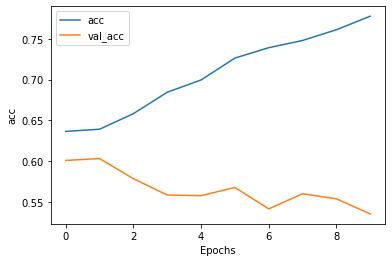

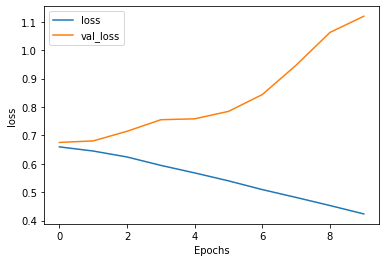

In [153]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "acc")
plot_graphs(history, "loss")